In [334]:
import pandas, numpy, systole, systole.reports, pywt
import matplotlib.pyplot as plt

ibi = pandas.read_csv ("current.csv", usecols = ['regular'])
ibi = ibi.to_numpy (dtype = numpy.float64).flatten ()
ibi = ibi[ibi > 0] # When a CSV column is empty, a row is filled with zeroes.

## Time Domain

Time domain measures do not provide a means to adequately quantify autonomic dynamics or determine the rhythmic or  
oscillatory activity generated by the different physiological control systems.

* **IBI** (926±90) Interbeat interval, in milliseconds. Also known as RR (R-to-R from the PQRST complex), or  
normal-to-normal as NN.
* **SDNN** (50±16) is the standard deviation of the normal beat intervals (denoted NN intervals). It encompasses both   
short-term high frequency variation (mostly due to parasympathetically-mediated RSA) and long-term low frequency   
components of the HR signals. Some proponents argue that the accuracy of SDNN is higher for longer recording periods,   
especially over 24 h periods where values of SDNN have been used for cardiac risk stratification in medical settings.  
In 24-h recordings, the SDNN is highly correlated with ULF and total power. Low age-adjusted values predict both  
morbidity and mortality. Classification within a higher SDNN category is associated with a higher probability of  
survival. For example, patients with moderate SDNN values, 50–100 ms, have a 400% lower risk of mortality than those  
with low values, 0–50 ms, in 24-h recordings.
* **SDSD**, standard deviation of successive difference
* **RMSSD** (42±15), root mean square successive difference. More influenced by the parasympathetic nervous system   
(PNS) activity and hence is often used to estimate the vagally mediated fluctuations in HR. Its statistical robustness  
makes it well-suited for short-term time windows. While the RMSSD is correlated with HF power, the influence of  
respiration rate on this index is uncertain. Lower RMSSD values are correlated with higher scores on a risk inventory  
of sudden unexplained death in epilepsy.
* **nn50**, **pnn50**, amount and proportion of successive intervals with threshold larger than 50 ms. It is correlated  
with the RMSSD and HF power. However, the RMSSD typically provides a better assessment of RSA (especially in older  
subjects).

===========  ======================  =========
Variable     Units                       Value
===========  ======================  =========
Mean RR      milliseconds (ms)        888.8688
Median RR    milliseconds (ms)        884.0000
Minimun RR   milliseconds (ms)        548.0000
Maximum RR   milliseconds (ms)       1326.0000

Mean BPM     beats per minute (bpm)    68.1239
Median BPM   beats per minute (bpm)    67.8733
Minimun BPM  beats per minute (bpm)    45.2489
Maximum BPM  beats per minute (bpm)   109.4891

SDNN         milliseconds (ms)         83.6222
SDSD         milliseconds (ms)         38.3067
RMSSD        milliseconds (ms)         38.3042
nn50         counts                  1165.0000
pnn50        %                         15.3917
===========  ======================  =========


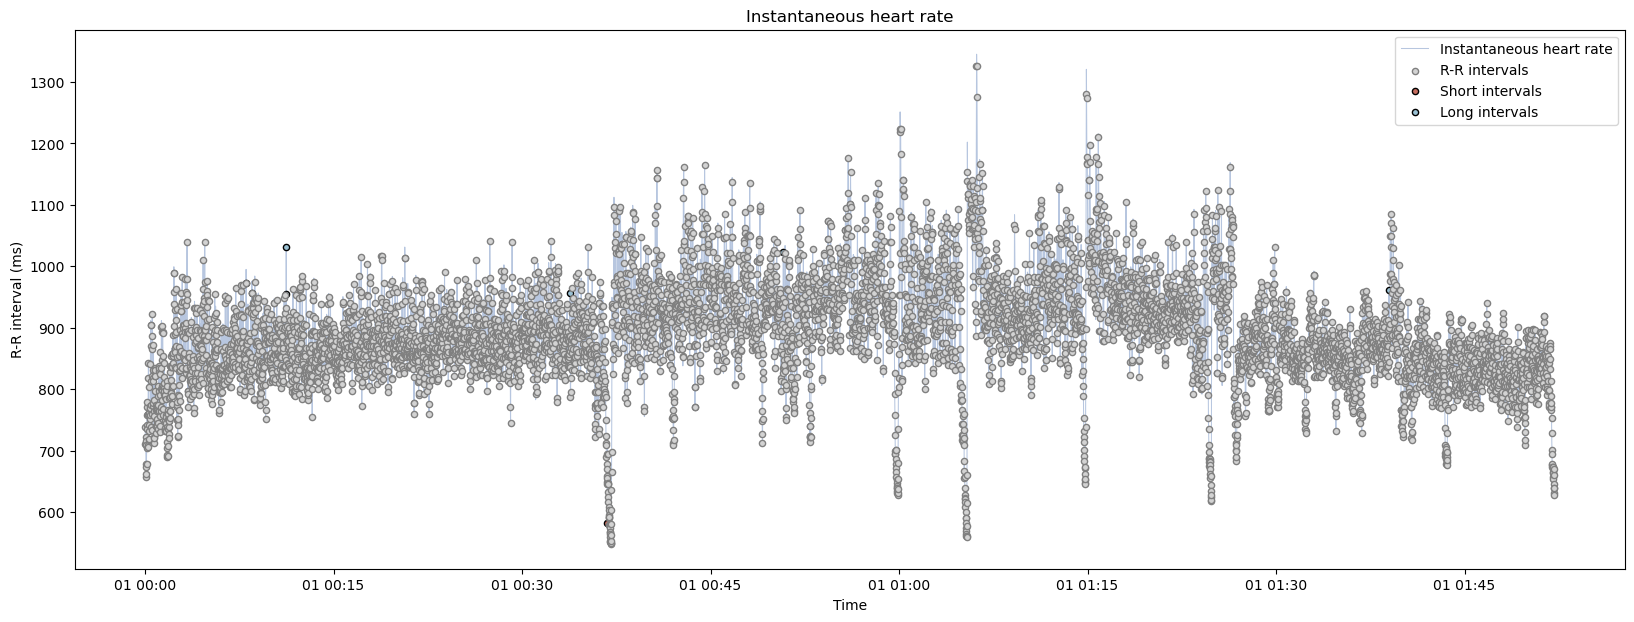

In [84]:
print (systole.reports.time_table (ibi))
systole.plots.plot_rr (ibi, show_artefacts = True, input_type = "rr_ms", figsize = (20, 7));

## Frequency Domain

As different regulatory systems modulate HR at distinct frequencies, frequency-domain indices reflect that   
distribution of power across different frequencies bands. Note that these fail to account for temporal variation.

Generally, due to the inherent differences in their signaling mechanisms, the parasympathetic (vagal) modulation of HR,   
including RSA, is faster than the sympathetic activities. Thus, research suggests that HF and LF are prominent   
reflections of parasympathetic and sympathetic activity. 

* **HF**, (657±777 ms², 40±10 nu, 0.15-0.4 Hz, 2-6s) relatively established as an index of the parasympathetic  
modulation of HR. Called the respiratory band because it corresponds to the HR variations related to the respiratory  
cycle (respiratory sinus arrhythmia - RSA). During inhalation, the cardiovascular center inhibits vagal outflow  
resulting in speeding the heart rate. Conversely, during exhalation, it restores vagal outflow resulting in slowing the  
heart rate via the release of acetylcholine. Deficient vagal inhibition is implicated in increased morbidity.  
Reduced parasympathetic (high frequency) activity has been found in a number of cardiac pathologies and in patients   
under stress or suffering from panic, anxiety, or worry. Lowered parasympathetic activity may primarily account for   
reduced HRV in aging. In younger healthy individuals, it is not uncommon to see an obvious increase in the HF band at   
night with a decrease during the day.

* **LF**, (519±291 ms², 40±10 nu, 0.04-0.15Hz, 6-25s) the interpretation of LF power as an index of sympathetic  
activities has been repeatedly challenged. It is modulated by both ANS (autonomic nervous system) branches as well as  
baroreceptor activities. The “baroreceptor range” report blood pressure (BP) information and their activations inhibit  
the SNS and activate the PNS, thus that baroreflex reduces the BP when it is detected high. Baroreflex gain is  
calculated as the beat-to-beat interval change per unit of change in BP. Decreased baroreflex gain is related to  
impaired regulatory capacity and aging.  
The sympathetic system does not appear to produce rhythms much above 0.1Hz (i.e. they are longer than 10s), while the  
parasympathetic system can be observed to affect heart rhythms down to 0.05 Hz (i.e. they are shorter than 20s).  
Therefore, respiratory-related influences are present in the LF band when respiration rates are longer than 7s or when  
an individual sighs or takes a deep breath. In resting conditions, the LF band reflects baroreflex activity and not  
cardiac sympathetic innervation. However, in long-term recordings (24h), the LF band fairly approximates sympathetic  
activity due to the physical acitvities, emotional stress and etc.

* **LF/HF** ratio (2.8±2.6). It is now generally accepted that both branches of the ANS can be simultaneously active.  
Therefore, the relationship between the SNS and PNS in generating LF power appears to be complex, non-linear, and  
dependent upon the experimental manipulation employed (e.g. ambulatory, resting, normal vs. paced breathing). Recall   
that the power in the LF band can be influenced by vagal, sympathetic, and baroreflex mechanisms depending on the  
context, whereas HF power is produced by the efferent vagal activity due to respiratory activity.

* **VLF** (0.0033-0.04Hz, 25s-300s). Although, all 24-h clinical measures of HRV reflecting low HRV are linked with   
increased risk of adverse outcomes, the VLF band has stronger associations with all-cause mortality than the LF and HF  
bands. Low VLF power has been shown to be associated with arrhythmic death, high inflammation and low levels of  
testosterone. Long-term regulation mechanisms and ANS activity related to thermoregulation, the renin-angiotensin   
system, and other hormonal factors may contribute to this band. Findings further support a cardiac origin of the VLF  
rhythm.  
In healthy individuals, there is an increase in VLF power that occurs during the night and peaks before waking. This  
increase in autonomic activity may correlate with the morning cortisol peak. Increases in resting VLF power may reflect  
increased sympathetic activity. The modulation of the frequency of this rhythm due to physical activity, stress  
responses, and other factors that increase efferent sympathetic activation can cause it to cross over into the lower  
region of the LF band during ambulatory monitoring or during short-term recordings when there is a significant stressor.  

* **ULF**, former (< 0.0033Hz, 300s+). Can be assessed with 24h and longer recordings. The circadian oscillation in  
heart rate is the primary source of the ULF power, although other very slow-acting regulatory processes, such as core  
body temperature regulation, metabolism, and the renin-angiotensin system likely add too. Different psychiatric  
disorders show distinct circadian patterns in 24-h heart rates, particularly during sleep. At the present time, the  
clinical relevance of these lower frequency rhythms is unknown.

Since the LF band primarily reflects the vagally-mediated transmission between the heart and the central nervous system  
in the context of short-term BP regulation, resting measurements should not be used as markers of SNS activity. Based on  
24-h monitoring, ULF and VLF rhythms are more strongly associated with overall health status than HF rhythms. When  
age-adjusted values are low, they are also more strongly associated with future health risk and all-cause mortality.

Limitation of the frequency-domain approach is pertaining to the inherent differences in the outputs of different  
spectral analysis algorithms. To allow for more reliable comparison of frequency components across studies, the spectral   
indices are often normalized by dividing the individual component by the total power (here, Power %).

=================  ============  =============  ===========  ==============
Frequency Band       Peaks (Hz)    Power (ms²)    Power (%)    Power (n.u.)
=================  ============  =============  ===========  ==============
VLF (0-0.04 Hz)          0.0078      2155.2473      48.3729
LF (0.04-0.15 Hz)        0.0469      1687.7187      37.8796         73.3716
HF (0.15-0.4 Hz)         0.2148       612.5165      13.7475         26.6284
Total                                4455.4826
LF/HF                                   2.7554
=================  ============  =============  ===========  ==============


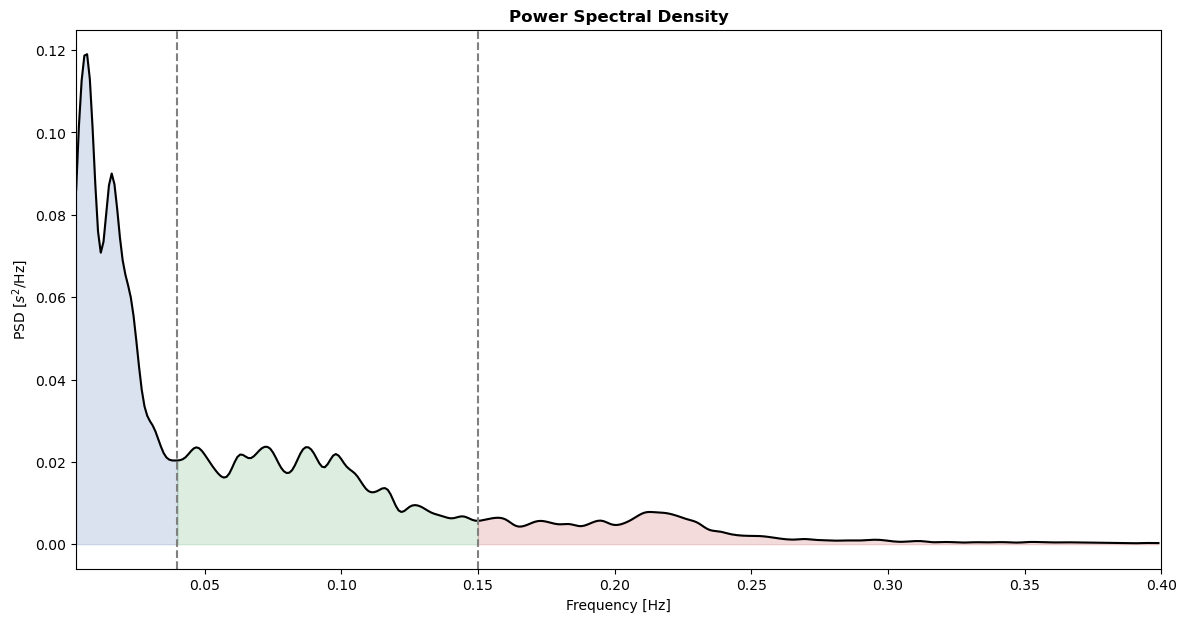

In [85]:
print (systole.reports.frequency_table (ibi))
systole.plots.plot_frequency (ibi, input_type = "rr_ms", figsize = (14, 7));

## Non-linear Domain

The Poincaré plot is a scatterplot of each NN/RR interval plotted against its corresponding preceding interval RR(n+1),   
which approximates the cardiac system’s evolution. The points are dispersed around the identity line and converge into   
an ellipsoid configuration. Points above the line represent HR decelerations (NN intervals that are longer than   
preceding ones) and points below the line of identity indicate HR accelerations.

Qualitatively, the Poincaré plot’s shape provides a visual summary of the heart’s behavior. From the plot, outliers such   
as premature heartbeats and other technical artefacts can be easily removed, something which cannot be done with   
spectral and most time-domain analyses. On a quantitative level, indices extracted from the plot correspond to   
time-domain indices. 

* **SD1** is the standard deviation of points perpendicular to the identity line and is equivalent to RMSSD, describing   
short-term NN variability. 
* **SD2** is the standard deviation of points parallel to the line of identity and is equivalent to SDNN, representing   
long-term NN variability. 

The former reflects short-term vagal activity whereas the latter represents sympathetic modulation. A third index,   
SD1/SD2, describes the ratio of short to long-term variations in NN interval fluctuations and reflects sympathovagal   
balance. SD1/SD2 has been shown to additionally capture complexity in HR patterns (e.g., healthy heart displays a   
“comet” shaped Poincaré plot while cardiac abnormalities display atypical “fan” or “complex” shapes). However, SD1/SD2   
seems to be sensitive to the time lag used, with some recent research recommending a lag of five or six heartbeats. 

========================  =================  =========
Variable                  Units                  Value
========================  =================  =========
-- Poincaré plot --
SD1                       milliseconds (ms)    27.0852
SD2                       milliseconds (ms)   115.1082

-- Recurrence plot --
Mean line length (Lmean)  beats                19.2617
Max line length (Lmax)    beats              2581.0000
Recurrence rate (REC)     %                    45.7588
Determinism (DET)         %                    69.3060
Shannon Entropy (ShanEn)                        3.7337
========================  =================  =========


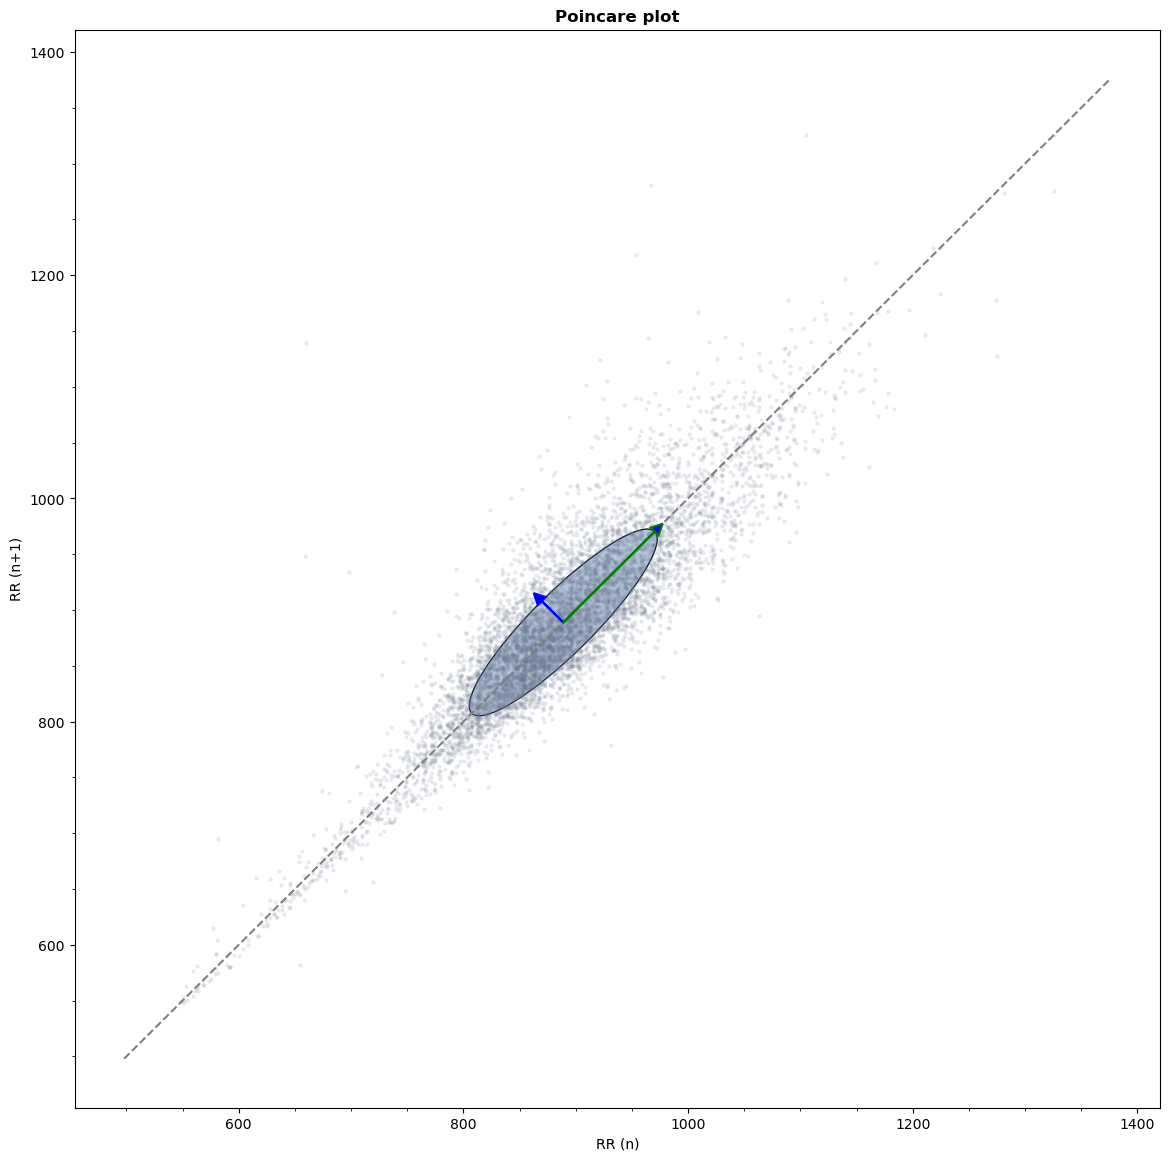

In [86]:
print (systole.reports.nonlinear_table (ibi))
systole.plots.plot_poincare (ibi, input_type = "rr_ms", figsize = (14, 14));

## Outliers and artefacts

* Missed R peaks, when an existing R component was erroneously NOT detected by the algorithm. 
* Extra R peaks, when an R peak was detected but does not exist in the signal. 
* Long or short interval intervals, when R peaks are correctly detected but the resulting interval has extreme value in  
  the overall time-series. 
* Ectopic beats, due to disturbance of the cardiac rhythm when the heart either skip or add an extra beat. 

The left panel plot subspaces that are more sensitive to ectopic beats detection. The right panel plot subspaces that  
will be more sensitive to long or short beats, comprizing the extra and missed beats. In the figure, the grey areas  
indicate the range of unlikely values considering each artefacts subtype. The intervals that are falling in these areas  
will be labelled as irregular.

   ectopic  short  long  missed  extra
0        0      1    10       0      0


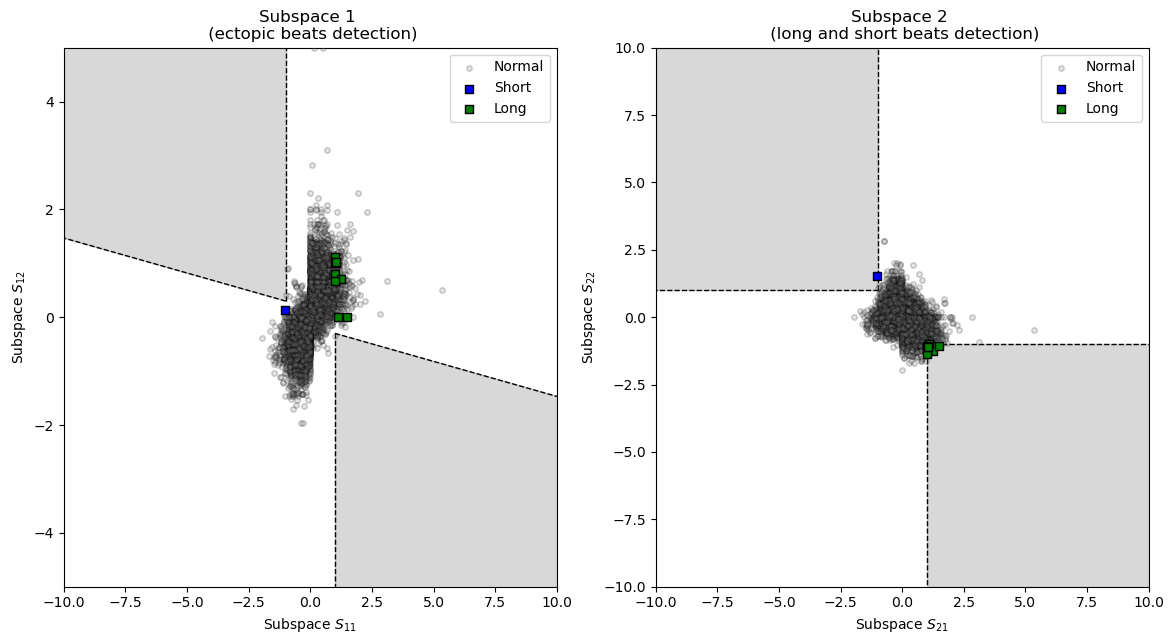

In [399]:
ibi_artefacts = systole.detection.rr_artefacts (ibi)
ibi_artefacts = pandas.DataFrame.from_dict (
        {k : [(ibi_artefacts[k] == True).sum ()] for k in ['ectopic', 'short', 'long', 'missed', 'extra']})
print (pandas.concat ([ibi_artefacts]))

_, ax = plt.subplots (ncols = 2, figsize = (14, 7))
systole.plots.plot_subspaces (ibi , input_type = "rr_ms", ax=ax);

## Theories

### Polyvagal
Increased efferent activity in the vagal nerves (also called the 10th cranial nerve) slows the heart rate, yet has an  
opposite effect in the lungs as it increases bronchial tone. The ANS must be considered a “system,” with the vagal  
nerves containing specialized subsystems that regulate competing adaptive responses. The unmyelinated fibers are  
involved in regulating the “freeze response” and respond to threats through immobilization, feigning death, passive  
avoidance, and shutdown (the freeze response). As human beings, we are not limited to fight, flight, or freezing  
behavioral responses. We can self-regulate and initiate pro-social behaviors (e.g., the tend-and-befriend response)  
when we encounter stressors. This system depends upon the healthy functioning of the myelinated vagus, a vagal brake,  
which allows for self-regulation and ability to calm ourselves and inhibit sympathetic outflow to the heart. This  
implies that standardized assessment of vagal tone could serve as a potential marker for one's ability to self-regulate.  
The evolution and healthy function of the ANS sets the limits or boundaries for the range of one's emotional expression,   
quality of communication, and ability to self-regulate emotions and behaviors.  
The SNS, in concert with the endocrine system, responds to threats to our safety through mobilization, fight-or-flight,  
and active avoidance. The SNS responds more slowly and for a longer period of time (i.e., more than a few seconds) than  
the vagus system. According to this theory, quality communication and pro-social behaviors can only be effectively  
engaged when these defensive circuits are inhibited.

### Neurovisceral Integration: The Central Autonomic Network (CAN) Model
Vagally-mediated HRV is linked to higher-level executive functions and that HRV reflects the functional capacity of the  
brain structures that support working memory and emotional and physiological self-regulation. They hypothesize that  
vagally-mediated HRV is positively correlated with prefrontal cortical performance and the ability to inhibit unwanted  
memories and intrusive thoughts. The prefrontal cortex can be taken “offline” when individuals perceive that they are  
threatened. Prolonged prefrontal cortical inactivity can lead to hypervigilance, defensiveness, and social isolation.  
The CAN model predicts reduced HRV and vagal activity in anxiety. Friedman (2007) argues that anxiety is associated  
with abnormal ANS cardiac control. HRV indices consistently show low vagal activity in patients diagnosed with anxiety  
disorders. This finding challenges the completeness of the sympathetic overactivation explanation of anxiety. From his  
perspective, anxiety disorders can involve varying degrees of sympathetic overactivation and parasympathetic  
underactivation.

### The Psychophysiological Coherence Model
Positive emotion in general, as well as self-induced positive emotions, shift the system as a whole into a more  
globally coherent and harmonious physiological mode associated with improved system performance, ability to   
self-regulate, and overall well-being. The term “physiological coherence” to describe the orderly and stable rhythms  
generated by living systems. “A coherent heart rhythm is defined as a relatively harmonic (sine-wave-like) signal with  
a very narrow, high-amplitude peak in the LF region of the HRV power spectrum with no major peaks in the VLF or HF  
regions. Coherence is assessed by identifying the maximum peak in the 0.04–0.26 Hz range of the HRV power spectrum,  
calculating the integral in a window 0.030 Hz wide, centered on the highest peak in that region, and then calculating  
the total power of the entire spectrum. The coherence ratio is formulated as: (Peak Power/[Total Power – Peak Power])”

### Increasing Vagal Afferent Traffic
Mechanosensitive neurons (baroreceptors) typically increase their firing rates when the rate of change in the function  
to which they are tuned increases. Heart rhythm coherence, which is characterized by increased beat-to-beat variability  
and the rate of heart rate change, increases vagal afferent traffic from the cardiovascular system to the brain.  
Increases in tonic vagal afferent traffic inhibit thalamic pain pathways traveling from the body to the brain at the   
level of the spinal cord. This finding may explain why studies have shown vagal afferent stimulation can reduce cluster  
and migraine headaches and HRV coherence training reduces chronic pain.

### Resonance Frequency Breathing
Assumes that taller individuals and men have lower resonance frequencies than women and shorter individuals due to the  
former's larger blood volumes, height only accounts for 30% of the variance in resonance frequency. Breathing, rhythmic  
muscle tension, and emotional stimulation at a person's resonance frequency can activate or stimulate the cardiovascular  
system's resonance properties. During this paced period, HR and BP oscillations are 180° out of phase, and HRV  
amplitude is maximized. This phase relationship between HR, respiration, and BP results in the most efficient gas  
exchange and oxygen saturation. This breathing vary between 4.5 to 6.5 breaths per minute in adults.  
With practice, people can learn to breathe at their cardiovascular system's resonance frequency. This aligns the three  
oscillators (baroreflex, HR, and BP) at that frequency and moves the peak frequency from the HF range (≈0.2 Hz) to the  
LF range (≈0.1 Hz). Breathing at the resonance frequency more than doubles the energy in the LF band (0.04–0.15 Hz).  
This corresponds to the Institute of HeartMath's heart rhythm coherence, which is associated with a “narrow,  
high-amplitude, easily visualized peak” from 0.09 to 0.14 Hz.

## References
* [Heart Rate Variability in Psychology: A Review of HRV Indices and an Analysis Tutoria](https://www.mdpi.com/1424-8220/21/12/3998)  
The use of heart rate variability (HRV) in research has been greatly popularized over the past decades due to the ease and affordability of HRV collection, coupled with its clinical relevance and significant relationships with psychophysiological constructs and psychopathological disorders. Despite the wide use of electrocardiograms (ECG) in research and advancements in sensor technology, the analytical approach and steps applied to obtain HRV measures can be seen as complex. Thus, this poses a challenge to users who may not have the adequate background knowledge to obtain the HRV indices reliably. To maximize the impact of HRV-related research and its reproducibility, parallel advances in users’ understanding of the indices and the standardization of analysis pipelines in its utility will be crucial. This paper addresses this gap and aims to provide an overview of the most up-to-date and commonly used HRV indices, as well as common research areas in which these indices have proven to be very useful, particularly in psychology. In addition, we also provide a step-by-step guide on how to perform HRV analysis using an integrative neurophysiological toolkit, NeuroKit2.
* [A robust algorithm for heart rate variability time series artefact correction using novel beat classification](https://www.tandfonline.com/doi/abs/10.1080/03091902.2019.1640306)  
The sensitivity of the algorithm to detect simulated missed/extra beats was 100%. The sensitivity to detect real atrial and ventricular ectopic beats was 96.96%, the corresponding specificity being 99.94%. The mean error in HRV parameters after correction was <2% for missed and extra beats as well as for misaligned beats generated with large displacement factors. Misaligned beats with smallest displacement factor were the most difficult to detect and resulted in largest HRV parameter errors after correction, largest errors being <8%.
* [A healthy heart is not a metronome: an integrative review of the heart's anatomy and heart rate variability](https://www.frontiersin.org/articles/10.3389/fpsyg.2014.01040/full)  
Heart rate variability (HRV), the change in the time intervals between adjacent heartbeats, is an emergent property of interdependent regulatory systems that operate on different time scales to adapt to challenges and achieve optimal performance. This article briefly reviews neural regulation of the heart, and its basic anatomy, the cardiac cycle, and the sinoatrial and atrioventricular pacemakers. The cardiovascular regulation center in the medulla integrates sensory information and input from higher brain centers, and afferent cardiovascular system inputs to adjust heart rate and blood pressure via sympathetic and parasympathetic efferent pathways. This article reviews sympathetic and parasympathetic influences on the heart, and examines the interpretation of HRV and the association between reduced HRV, risk of disease and mortality, and the loss of regulatory capacity. This article also discusses the intrinsic cardiac nervous system and the heart-brain connection, through which afferent information can influence activity in the subcortical and frontocortical areas, and motor cortex. It also considers new perspectives on the putative underlying physiological mechanisms and properties of the ultra-low-frequency (ULF), very-low-frequency (VLF), low-frequency (LF), and high-frequency (HF) bands. Additionally, it reviews the most common time and frequency domain measurements as well as standardized data collection protocols. In its final section, this article integrates Porges' polyvagal theory, Thayer and colleagues' neurovisceral integration model, Lehrer et al.'s resonance frequency model, and the Institute of HeartMath's coherence model. The authors conclude that a coherent heart is not a metronome because its rhythms are characterized by both complexity and stability over longer time scales. Future research should expand understanding of how the heart and its intrinsic nervous system influence the brain.
* https://en.wikipedia.org/wiki/Heart_rate_variability

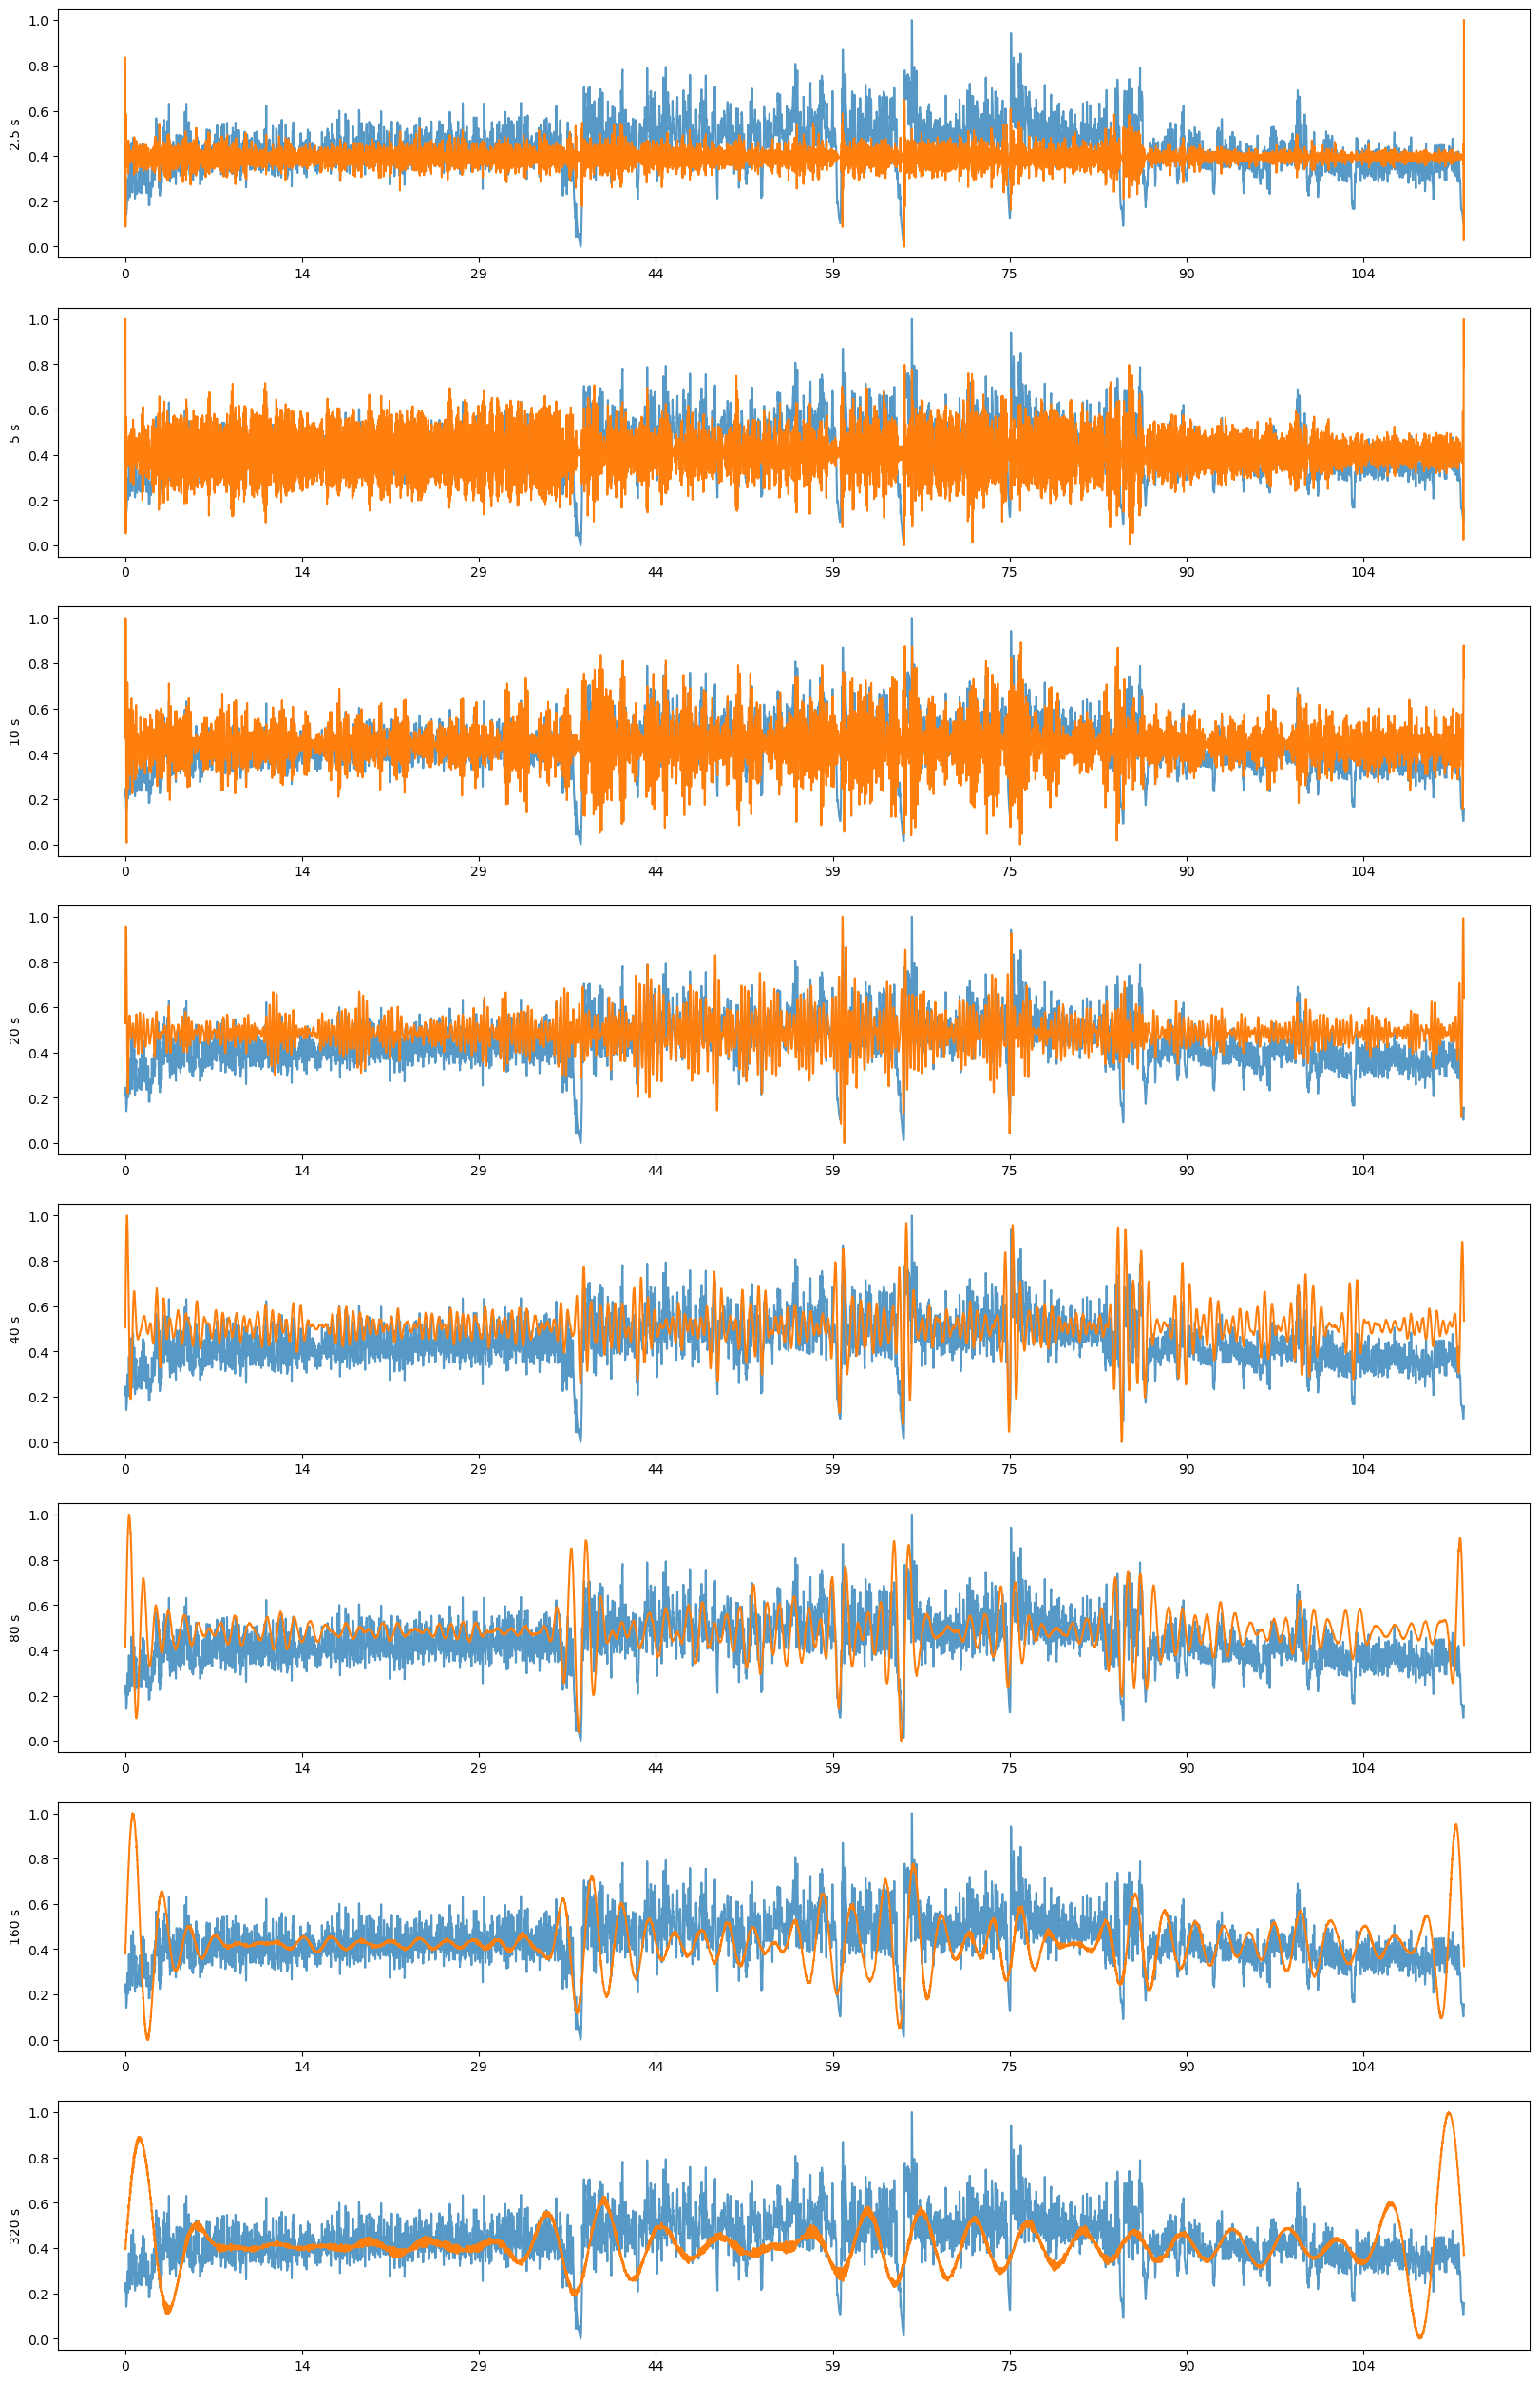

In [415]:
wavelet = 'morl'
periods = [2.5, 5, 10, 20, 40, 80, 160, 320]
scales = pywt.frequency2scale (wavelet, 1 / numpy.array (periods))
_, ax = plt.subplots (nrows = len (periods), figsize = (20, 4 * len (periods)))
coef, _ = pywt.cwt (ibi, scales, wavelet)
coef = (coef - numpy.min (coef, axis = 1, keepdims = True)) / numpy.ptp (coef, axis = 1, keepdims = True)
ibi_n = (ibi - numpy.min (ibi)) / numpy.ptp (ibi)
csum = ibi.cumsum ()
for i, s in enumerate (coef):
    ax[i].plot (ibi_n, alpha = 0.75)
    ax[i].plot (s)
    #ax[i].plot (pandas.Series (s).rolling (window = 50).mean ())
    ax[i].get_xaxis ().set_major_formatter (
        plt.FuncFormatter (lambda x, loc: "{:.0f}".format (x < len (csum) and csum[int (x)] / 60000 or 0)))
    ax[i].set_ylabel (str (periods[i]) + " s")
plt.show () 